# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data presentation

Population: EV charging sessions
Sample: 

## Data Import

In [31]:
df = pd.read_csv('EVChargingStationUsage.csv')
df

/var/folders/0f/4l5yr1gx3xn88xhbz1m_1v140000gn/T/ipykernel_33489/100100954.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


## Data Cleaning

In [32]:
df.drop(columns=['County', 'System S/N', 'Model Number','EVSE ID','Port Type','Port Number','Plug Type','Fee','Currency'],inplace=True)
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,City,State/Province,Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,3,95124.0,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,4,94301.0,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,5,94301.0,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,6,94302.0,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,7,94043.0,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,Palo Alto,California,94306,United States,37.428623,-122.144043,Plug Out at Vehicle,2369,94301.0,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7255,94541.0,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,Palo Alto,California,94303,United States,37.422104,-122.113510,Plug Out at Vehicle,455,94306.0,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7256,94552.0,804075


In [33]:
#removes duplicates (removes entire row)
df.drop_duplicates()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,City,State/Province,Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,3,95124.0,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,4,94301.0,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,5,94301.0,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,6,94302.0,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,7,94043.0,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,Palo Alto,California,94306,United States,37.428623,-122.144043,Plug Out at Vehicle,2369,94301.0,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7255,94541.0,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,Palo Alto,California,94303,United States,37.422104,-122.113510,Plug Out at Vehicle,455,94306.0,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7256,94552.0,804075


In [34]:
# Removes empty cells (removes entire row)
df.dropna() 

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,City,State/Province,Postal Code,Country,Latitude,Longitude,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,3,95124.0,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,4,94301.0,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,5,94301.0,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Customer,6,94302.0,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,Palo Alto,California,94301,United States,37.444572,-122.160309,Plug Out at Vehicle,7,94043.0,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,Palo Alto,California,94306,United States,37.428623,-122.144043,Plug Out at Vehicle,2369,94301.0,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7255,94541.0,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,Palo Alto,California,94303,United States,37.422104,-122.113510,Plug Out at Vehicle,455,94306.0,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,Palo Alto,California,94301,United States,37.448284,-122.158272,Plug Out at Vehicle,7256,94552.0,804075


## Descriptive Statistics :

### Summary Stats

In [35]:
df.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Postal Code,Latitude,Longitude,Plug In Event Id,Driver Postal Code
count,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000
mean,8.544277,3.588596,1.072306,94302.315768,37.439565,-122.151264,1.188685e+08,94170.308255
std,7.185462,3.017894,0.901776,1.941657,0.009621,0.015382,4.057750e+08,4249.837126
min,0.010000,0.004000,0.001000,94301.000000,37.422104,-122.163239,1.000000e+00,1013.000000
25%,3.784000,1.589000,0.475000,94301.000000,37.428318,-122.162170,1.573000e+03,94087.000000
50%,6.868634,2.885000,0.862000,94301.000000,37.444489,-122.158272,3.573000e+03,94304.000000
75%,11.458340,4.813000,1.438000,94303.000000,37.446613,-122.145699,6.340000e+03,94804.000000
max,97.360000,40.891000,12.219000,94306.000000,37.449375,-122.112480,1.609436e+09,99354.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

## Graphical representations :  

### Continuous variables :

(array([3.6983e+04, 4.7981e+04, 5.3986e+04, 3.4909e+04, 2.9836e+04,
        1.9610e+04, 1.3076e+04, 8.7780e+03, 4.5020e+03, 2.1820e+03,
        1.4690e+03, 1.2300e+03, 1.0200e+03, 6.4900e+02, 5.1600e+02,
        4.1200e+02, 3.4600e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e-02, 2.443750e+00, 4.877500e+00, 7.311250e+00,
        9.745000e+00, 1.217875e+01, 1.461250e+01, 1.704625e+01,
        1.948000e+01, 2.191375e+01, 2.434750e+01, 2.678125e+01,
        2.921500e+01, 3.164875e+01, 3.408250e+01, 3.651625e+01,
        3.895000e+01, 4.138375e+01, 4.381750e+01, 4.625125e+01,
        4.868500e+01, 5.111875e+01, 5.355250e+01, 5.598625e+01,
        5.842000e+01, 6.085375e+01, 6.328750e+01, 6.572125e+01,
      

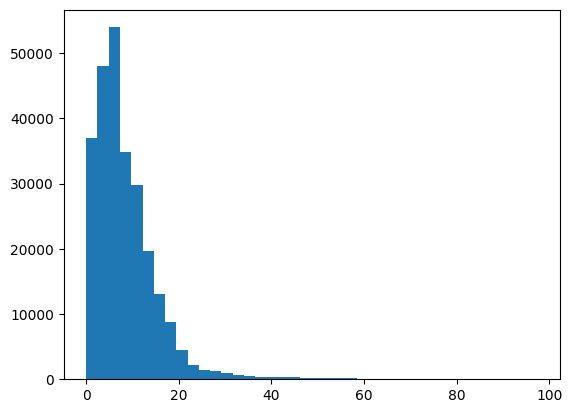

In [37]:
bins = 40
plt.hist(df['Energy (kWh)'],bins)

(array([3.6990e+04, 4.7972e+04, 5.3977e+04, 3.4905e+04, 2.9836e+04,
        1.9627e+04, 1.3074e+04, 8.7760e+03, 4.5040e+03, 2.1820e+03,
        1.4690e+03, 1.2310e+03, 1.0190e+03, 6.4900e+02, 5.1600e+02,
        4.1100e+02, 3.4700e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000000e-03, 1.0261750e+00, 2.0483500e+00, 3.0705250e+00,
        4.0927000e+00, 5.1148750e+00, 6.1370500e+00, 7.1592250e+00,
        8.1814000e+00, 9.2035750e+00, 1.0225750e+01, 1.1247925e+01,
        1.2270100e+01, 1.3292275e+01, 1.4314450e+01, 1.5336625e+01,
        1.6358800e+01, 1.7380975e+01, 1.8403150e+01, 1.9425325e+01,
        2.0447500e+01, 2.1469675e+01, 2.2491850e+01, 2.3514025e+01,
        2.4536200e+01, 2.5558375e+01, 2.658055

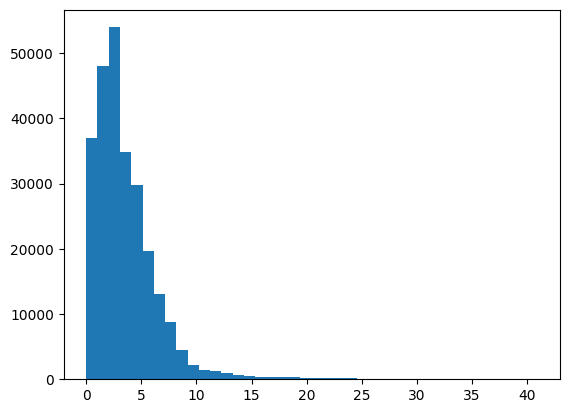

In [38]:
bins = 40
plt.hist(df['GHG Savings (kg)'],bins)

(array([3.6954e+04, 4.7912e+04, 5.4073e+04, 3.4853e+04, 2.9909e+04,
        1.9575e+04, 1.3110e+04, 8.7650e+03, 4.5110e+03, 2.1810e+03,
        1.4680e+03, 1.2320e+03, 1.0190e+03, 6.5100e+02, 5.1400e+02,
        4.1400e+02, 3.4400e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e-03, 3.064500e-01, 6.119000e-01, 9.173500e-01,
        1.222800e+00, 1.528250e+00, 1.833700e+00, 2.139150e+00,
        2.444600e+00, 2.750050e+00, 3.055500e+00, 3.360950e+00,
        3.666400e+00, 3.971850e+00, 4.277300e+00, 4.582750e+00,
        4.888200e+00, 5.193650e+00, 5.499100e+00, 5.804550e+00,
        6.110000e+00, 6.415450e+00, 6.720900e+00, 7.026350e+00,
        7.331800e+00, 7.637250e+00, 7.942700e+00, 8.248150e+00,
      

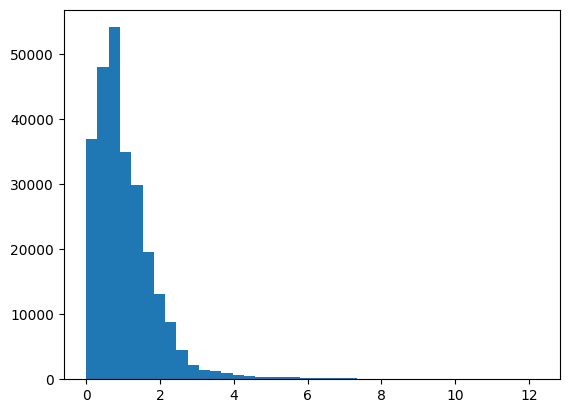

In [29]:
bins = 40
plt.hist(df['Gasoline Savings (gallons)'],bins)

### Discrete variable :